In [1]:
# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from easyesn import RegressionESN
from easyesn import helper as hlp

Using Numpy backend.


In [11]:
inputLength = 2000
n = 500
x = np.empty((n, inputLength))
y = np.empty((n, 1))
domain = np.linspace(0, 4*np.pi, inputLength)

for i in range(n):
    y[i, 0] = np.random.rand()*10
    x[i] = y[i, 0]*2*np.sin(domain)
    
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
esn = RegressionESN(n_input=1, n_output=1, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr")

In [5]:
esn.fit(x_train, y_train, transientTime=100, verbose=1)

2.8914594848209467

In [12]:
y_test_pred = esn.predict(x_test, transientTime=100, verbose=1)

100% (165 of 165) |############################################################################################################################| Elapsed Time: 0:00:12 Time: 0:00:12


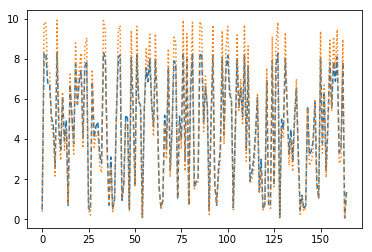

In [13]:
plt.plot(y_test_pred, "--")
plt.plot(y_test, ":")
plt.show()

In [14]:
print(np.mean((y_test_pred-y_test)**2))
print(np.mean(np.abs(y_test_pred-y_test)))

0.513482053292
0.543762119368
